#Polinomios de interpolación de Lagrange
El *polinomio de interpolación de lagrange* es simplemente una reformulación del polinomio de Newton que evita el cálculo de diferencias divididas, y se representa de manera conscisa como
\begin{equation}
f_n(x)=\sum_{i=1}^{n}L_i(x)f(x_i)
\end{equation}
donde
\begin{equation}
f(x_i)=\prod_{j_{j\neq i}=0}^{n}\frac{x-x_j}{x_i-x_j}
\end{equation}
Por ejemplo, la versión lineal ($n=1$) es
\begin{equation}
f_1(x)=\frac{x-x_1}{x_0-x_1}f(x_0)+\frac{x-x_0}{x_1-x_0}f(x_1)
\end{equation}
y la de segundo grado es
\begin{equation}
f_2(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)+\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)+\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)
\end{equation}


f     i
----  -----
z(m)  T(°C)
0     22.8
2.3   22.8
4.9   22.8
9.1   20.6
13.7  13.9
18.3  11.7
22.9  11.1
27.2  11.1


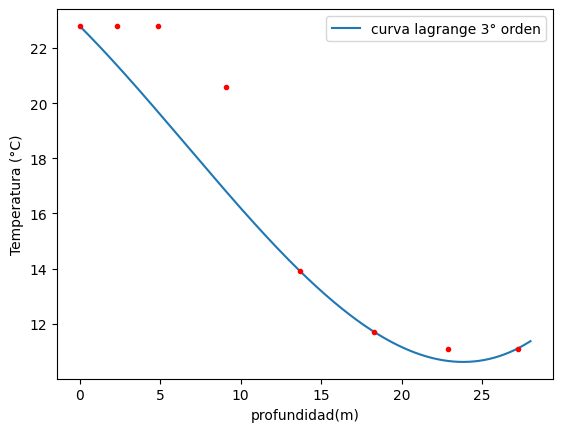

In [2]:
#Código hecho por: Joel Alejandro García Paredes
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
#Profundidad de la ternoclina en el lago Platte
#En este caso se hara la interpolacion de la Temperatura vs la profundidad
T=[22.8,22.8,22.8,20.6,13.9,11.7,11.1,11.1] #Temperatura en °C
z=[0,2.3,4.9,9.1,13.7,18.3,22.9,27.2] #profundidad en m
n=len(z)
#Interpolacion por polinomios de Lagrange de 3 orden
x0=z[0]
x1=z[4]
x2=z[5]
x3=z[7]
T0=T[0]
T4=T[4]
T5=T[5]
T7=T[7]
def L03(x):
  return ((x-x1)/(x0-x1))*((x-x2)/(x0-x2))*((x-x3)/(x0-x3))

def L13(x):
  return ((x-x0)/(x1-x0))*((x-x2)/(x1-x2))*((x-x3)/(x1-x3))

def L23(x):
  return ((x-x0)/(x2-x0))*((x-x1)/(x2-x1))*((x-x3)/(x2-x3))

def L33(x):
  return ((x-x0)/(x3-x0))*((x-x1)/(x3-x1))*((x-x2)/(x3-x2))

def L3(x):
  return L03(x)*T0+L13(x)*T4+L23(x)*T5+L33(x)*T7

x=np.arange(0,28,0.001)
y=L3(x)

tabla=[['z(m)','T(°C)'],
       [z[0],T[0]],
       [z[1],T[1]],
       [z[2],T[2]],
       [z[3],T[3]],
       [z[4],T[4]],
       [z[5],T[5]],
       [z[6],T[6]],
       [z[7],T[7]]]
print(tabulate(tabla,headers='firtsrow'))

plt.plot(x,y,label='curva lagrange 3° orden')
for i in range(n):
  plt.plot(z[i],T[i],'.',color='red')
plt.xlabel('profundidad(m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

#Usando librería interpolate


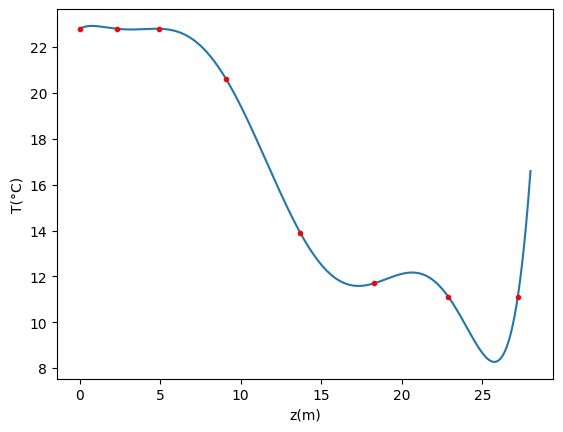

In [5]:
from scipy.interpolate import lagrange
T=[22.8,22.8,22.8,20.6,13.9,11.7,11.1,11.1] #Temperatura en °C
z=[0,2.3,4.9,9.1,13.7,18.3,22.9,27.2] #profundidad en m
f=lagrange(z,T)
x=np.arange(0,28,0.01)
y=f(x)
plt.plot(x,y,)
for i in range(0,8):
  plt.plot(z[i],T[i],'.',color='red')
plt.xlabel('z(m)')
plt.ylabel('T(°C)')
plt.show()